In [3]:
#pip install xlrd

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import datetime 
import math
import numpy as np
import matplotlib.pyplot as plt

c_path = 'Coefs.csv'
c_df = pd.read_csv(c_path) 
import pandas as pd
import datetime 
import math
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set() #sns.reset_orig()
%matplotlib inline

c_path = 'Coefs.csv'
c_df = pd.read_csv(c_path) 

p_path = 'Palmares.csv'
p_df = pd.read_csv(p_path, infer_datetime_format=True).fillna(0)   




p_df['UCL']= p_df['UCL'].astype(int)
p_df['WC']= p_df['WC'].astype(int)
p_df['EC']= p_df['EC'].astype(int)
p_df['AFC']= p_df['AFC'].astype(int)
p_df['SAC']= p_df['SAC'].astype(int)
p_df['ASC']= p_df['ASC'].astype(int)

p_df['Score']= 1.5 * (c_df.loc[0,'UCL'] * p_df['UCL'] + c_df.loc[0,'WC'] * p_df['WC'] + c_df.loc[0,'EC'] * p_df['EC'] + c_df.loc[0,'SAC'] * p_df['SAC'] + c_df.loc[0,'AFC'] * p_df['AFC']  )
p_df = p_df[p_df['Score'] > 0]

p_df['BDC']  = pd.to_datetime(p_df['BD'],infer_datetime_format=True)  - datetime.datetime.now() 
p_df ['Age'] = (-p_df['BDC'].dt.days /365)

## Teams Ranking

de = p_df.groupby('Nation').agg({"Score":'sum',"Age":'mean' }).sort_values (by='Score', ascending=False).reset_index().sort_values(["Score", "Age"], ascending = (False, True))

#de['Order'] = de['Score'].rank(ascending=False,method='first').astype(int)

de['Mean Age'] = de['Age'].apply(lambda x: round(x, 2))

pd.options.display.float_format = '{:,.1f}'.format

de = de [['Nation','Score','Mean Age']]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
 #print(de.to_string(index=False))

de.index = np.arange(1, len(de)+1)
#de


dee = de.head(10).iloc[::-1]
#dee.set_index('Club', inplace=True)
dee





,Nation,Score,Mean Age
10,WAL,33.8,33.0
9,CRO,60.8,32.5
8,ENG,60.8,26.9
7,ARG,63.8,28.2
6,POR,65.2,31.8
5,ITA,90.0,28.5
4,BRA,183.8,29.5
3,GER,184.5,29.4
2,FRA,203.2,29.0
1,ESP,410.2,30.9


In [2]:
# Vizualization

# Vizualization

dee.index = np.arange(1, len(dee)+1)

dee['Pie'] = 100*dee['Score']/ dee['Score']. sum(axis=0)

dee = dee [['Nation','Score','Pie','Mean Age']]

dee

,Nation,Score,Pie,Mean Age
1,WAL,33.8,2.5,33.0
2,CRO,60.8,4.5,32.5
3,ENG,60.8,4.5,26.9
4,ARG,63.8,4.7,28.2
5,POR,65.2,4.8,31.8
6,ITA,90.0,6.6,28.5
7,BRA,183.8,13.6,29.5
8,GER,184.5,13.6,29.4
9,FRA,203.2,15.0,29.0
10,ESP,410.2,30.3,30.9


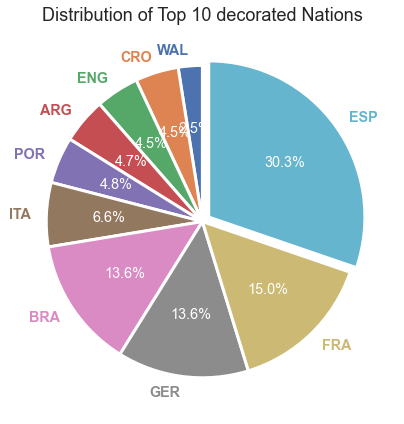

In [3]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = dee['Nation']

sizes = dee['Pie']
explode = (0,0,0,0,0,0,0,0,0,0.05)  

fig1, ax1 = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, startangle=90)

# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

ax1.set_title('Distribution of Top 10 decorated Nations', fontsize=18)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()


filename = 'Nations_Score_Distribution'

plt.savefig(c_df.loc[0,'Model']+'_'+filename+'.png', facecolor=(.94, .94, .94))

#plt.show()
    